**Unsupervised Learning**

Welcome to my kernel.We will have learnt kmeans and hierarchical cluster.I hope you learn something from this kernel.
I think ı explained kernel but there is you don't understand you ask me everytime in comment.DONT FORGET UPVOTE.Let's go 

In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['column_2C_weka.csv', 'column_3C_weka.csv']


In [43]:
#We read data
data = pd.read_csv("../input/column_2C_weka.csv")

We have this data but data point in yellow circle if we drop this data we will wrong with separate clusters that's why we drop it

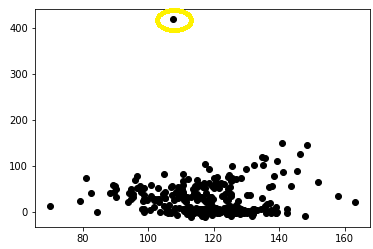

In [44]:
#We ignore this
a = data.degree_spondylolisthesis.max()
data[data.degree_spondylolisthesis == a] = np.mean(data.degree_spondylolisthesis)

In [45]:
#The feature of our data(if you dont know feature it is like header)
data.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

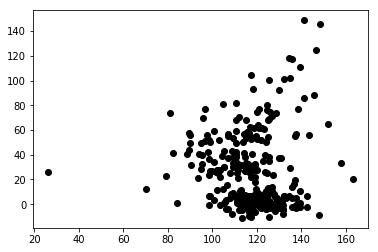

In [46]:
import matplotlib.pyplot as plt 
#We use sacral_radius and pelvic incidence for showing our cluster.
plt.scatter(x = data["pelvic_radius"],y = data["degree_spondylolisthesis"],color = "black")
x = data["pelvic_radius"]
y = data["degree_spondylolisthesis"]
#we use two columns for clustering our data.The computer see our data so 

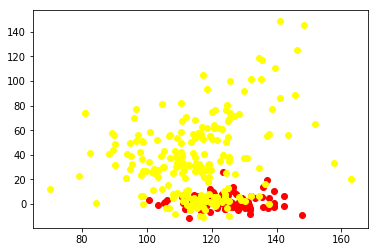

In [47]:
#we can draw with class.It is original class
plt.scatter(x = data[data["class"] == "Normal"].pelvic_radius , y = data[data["class"] == "Normal"].degree_spondylolisthesis,color = "red")
plt.scatter(x = data[data["class"] == "Abnormal"].pelvic_radius , y = data[data["class"] == "Abnormal"].degree_spondylolisthesis,color = "yellow")
#probably we use two columns for clustering

**K-Means Cluster**

Already the data have been classified but we do this for you learn.We will do other clustering model is hierarchical cluster but ı most like k means

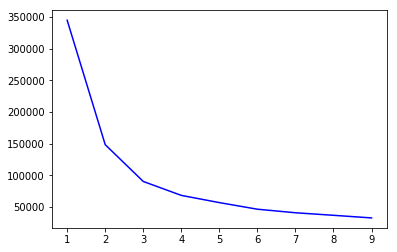

In [48]:
#We implement our model so. We need just one data
cluster_data_arg = {"x":x,"y":y}
cluster_data = pd.DataFrame(cluster_data_arg)
from sklearn.cluster import KMeans
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(cluster_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,color="blue")
plt.show()
#Number of cluster should be 2.We look the most increase where(you can look "elbow" rules)

You look elbow rule understanding this.I understand down

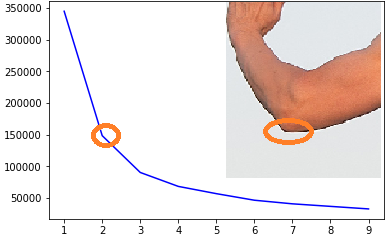

In [49]:
#if we want to add label to data We do cluster data(x and y)
kmeans2 = KMeans(n_clusters = 2)
clusters = kmeans2.fit_predict(cluster_data)
data["label"] = clusters

In [50]:
#We look how many whether true our clusters
data_ac = pd.read_csv("../input/column_2C_weka.csv")
data_ac["class"] = [0 if each == "Abnormal" else 1 for each in data_ac["class"]]
data_ac_class = data_ac["class"]
predict_class = data["label"]
print("accuracy is : {}".format(100 - np.mean(np.abs(data_ac_class - predict_class)*100)))
kmeans_accuracy = int(100 - np.mean(np.abs(data_ac_class - predict_class)*100))

accuracy is : 62.25806451612903


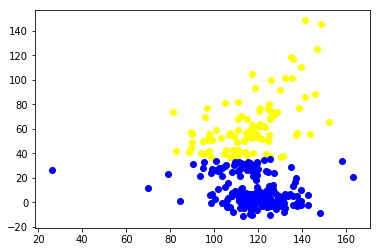

In [51]:
#We draw our data with clusters.We have 0,1,2 label
plt.scatter(x = data[data.label == 0].pelvic_radius,y = data[data.label == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = data[data.label == 1].pelvic_radius,y = data[data.label == 1].degree_spondylolisthesis , color = "blue")

**Hierarcihal Cluster**

Other cluster method is hierarcihal cluster it is not easy than kmeans but kmeans the simplest clusters method to me

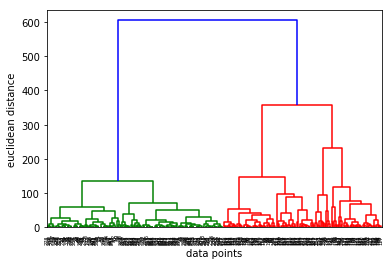

In [52]:
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(cluster_data,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [53]:
from sklearn.cluster import AgglomerativeClustering

hiyerartical_cluster = AgglomerativeClustering(n_clusters = 2,affinity= "euclidean",linkage = "ward")
cluster = hiyerartical_cluster.fit_predict(cluster_data)

data["label_hc"] = cluster

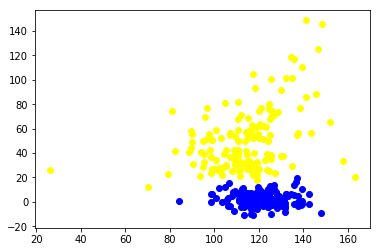

In [54]:
plt.scatter(x = data[data.label_hc == 0].pelvic_radius,y = data[data.label_hc == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = data[data.label_hc == 1].pelvic_radius,y = data[data.label_hc == 1].degree_spondylolisthesis , color = "blue")

In [55]:
#Let's we calculate accuracy.
#data_ac["class"] = [0 if each == "Abnormal" else 1 for each in data_ac["class"]]
#data_ac_class = data_ac["class"]
#predict_class = data["label"]
print("accuracy is : {}".format(100 - np.mean(np.abs(data_ac_class - data["label_hc"])*100)))
hc_accuracy = int(100 - np.mean(np.abs(data_ac_class - data["label_hc"])*100))

accuracy is : 78.38709677419355


**Comparing Cluster's Method**

We compare two accuracy with plotly plot 

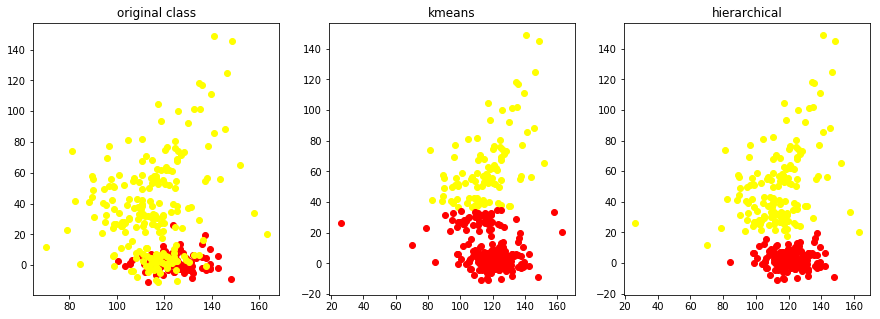

In [68]:
#We compare our model in graph
fig = plt.figure(figsize = (15,5))

plt.subplot(1, 3, 1)
plt.scatter(x = data[data["class"] == "Normal"].pelvic_radius , y = data[data["class"] == "Normal"].degree_spondylolisthesis,color = "red")
plt.scatter(x = data[data["class"] == "Abnormal"].pelvic_radius , y = data[data["class"] == "Abnormal"].degree_spondylolisthesis,color = "yellow")
plt.title("original class")

plt.subplot(1, 3, 2)
plt.scatter(x = data[data.label == 0].pelvic_radius,y = data[data.label == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = data[data.label == 1].pelvic_radius,y = data[data.label == 1].degree_spondylolisthesis , color = "red")
plt.title("kmeans") 

plt.subplot(1, 3, 3)
plt.scatter(x = data[data.label_hc == 0].pelvic_radius,y = data[data.label_hc == 0].degree_spondylolisthesis , color = "yellow")
plt.scatter(x = data[data.label_hc == 1].pelvic_radius,y = data[data.label_hc == 1].degree_spondylolisthesis , color = "red")
plt.title("hierarchical")

plt.show()

In [56]:
#We have hc_accuracy and kmeans_accuracy
list1 = ["hc","kmeans"]
list2 = [hc_accuracy,kmeans_accuracy]
list3 = [100 - hc_accuracy,100 - kmeans_accuracy]
dictionary = {"name":list1,"value":list2,"hundred":list3}
dt = pd.DataFrame(dictionary)

In [57]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
trace1 = go.Bar(
x = dt.name,
y = dt.value,
name="accuracy",
marker = {"color":"rgba(111,23,155,0.5)"},
text=dt.name
)
trace2 = go.Bar(
x = dt.name,
y = dt.hundred,
name="mistake",
marker = {"color":"rgba(47,69,187)"},
)
fig_data = [trace1,trace2]
layout = go.Layout(barmode = "relative")
fig = go.Figure(data = fig_data, layout = layout)
iplot(fig)


The accuracy of hierarcihal cluster accuracy is higher than kmeans our data but everytime isn't so 

**Conclusion**

We did kmeans and hierarchical cluster ı hope you can understand this topic.If ı have mistake ı am sorry.You can look other kernel.Ca you vote me and feedback.Thanks for upvote